In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

In [4]:
# 2. Load dataset
data = pd.read_csv(r"C:\Users\bbuser\Downloads\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# 3. Features and target
X = data.drop("Outcome", axis=1)   # all input features
y = data["Outcome"]                # target (0 = No Diabetes, 1 = Diabetes)


In [6]:
# 4. Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [7]:
# 5. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Logistic Regression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

In [9]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=5)   # try k=5 first
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


Logistic Regression Performance:
Accuracy:  0.745
Precision: 0.677
Recall:    0.519
F1-score:  0.587

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231



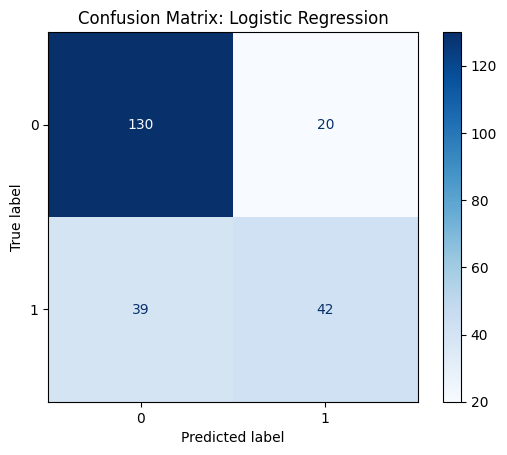


KNN (k=5) Performance:
Accuracy:  0.714
Precision: 0.615
Recall:    0.494
F1-score:  0.548

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       150
           1       0.62      0.49      0.55        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.71       231



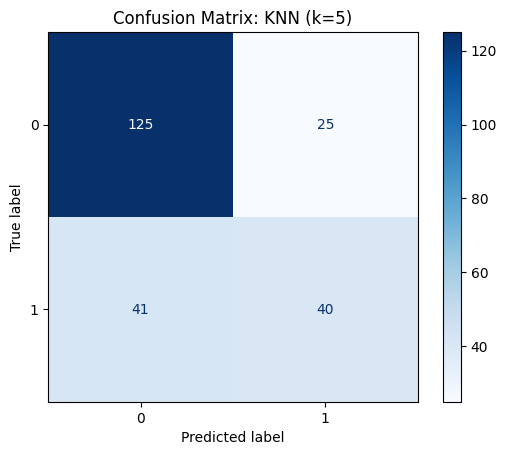

In [11]:
# Evaluation Function

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.3f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.3f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("KNN (k=5)", y_test, y_pred_knn)